In [1]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
from nilearn import datasets
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import nibabel as nib
import rpy2.robjects as robjects
os.chdir('../Wehbe')

/gpfs/milgram/project/chun/hf246/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/gpfs/milgram/project/chun/hf246/anaconda3/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/gpfs/milgram/project/chun/hf246/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/gpfs/milgram/project/chun/hf246/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code


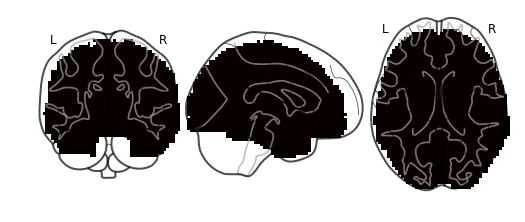

In [2]:
sub = '1'
layer = 'glove'
contexts = ['0s_','1s_','2s_','4s_','16s_','1600s_']
path_to_fmri = '/gpfs/milgram/scratch/chun/hf246/wehbe_fmri/'
f = scipy.io.loadmat(path_to_fmri + 'subject_1.mat')
affine = f['meta'][0][0][12]
im = nib.Nifti1Image(np.array(f['meta'][0][0][7]>0).astype(int), affine=affine)
plotting.plot_glass_brain(im)

In [3]:
affine

array([[  -3,    0,    0,   81],
       [   0,    3,    0, -115],
       [   0,    0,    3,  -73],
       [   0,    0,    0,    1]], dtype=int16)

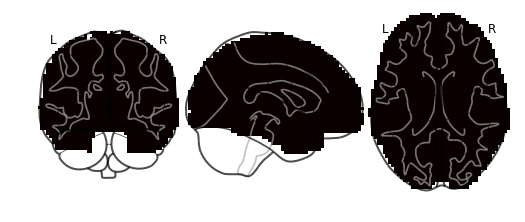

In [4]:
affine1=[[  -3.1,    0,    0,   81],[   0,    3.3,    0, -115],[   0,    0,    3.1,  -70],[   0,    0,    0,    1]]
im = nib.Nifti1Image(np.array(f['meta'][0][0][7]>0/2).astype(int), affine=affine1)
plotting.plot_glass_brain(im)

Test plotting alignment

Just do one context first: 0s

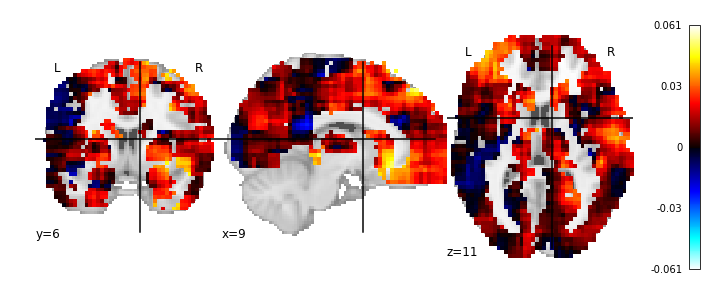

In [5]:
context = '0s_'
f = ('../Wehbe/%s_%s_%srdm_SL_result.npy' % (sub, layer, context))
rmap = np.load(f)
im = nib.Nifti1Image(rmap, affine=affine1)

f, ax = plt.subplots(1,1, figsize = (12, 5))
plotting.plot_stat_map(im, axes=ax)

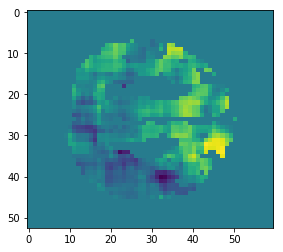

In [6]:
plt.imshow(rmap[:,:,40])
plt.show()

Analyzing subject 1 lstm masks

<Figure size 432x288 with 0 Axes>

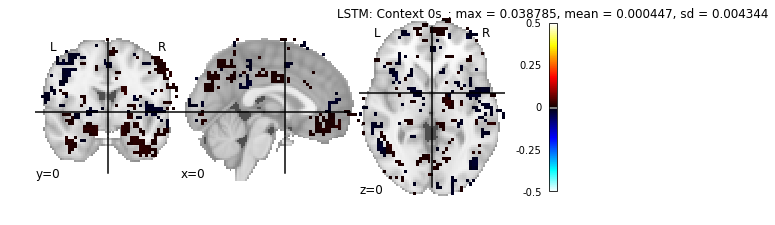

<Figure size 432x288 with 0 Axes>

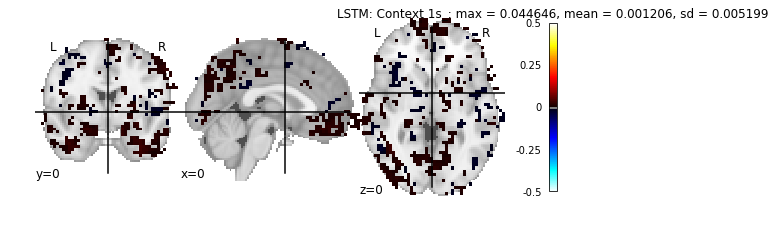

<Figure size 432x288 with 0 Axes>

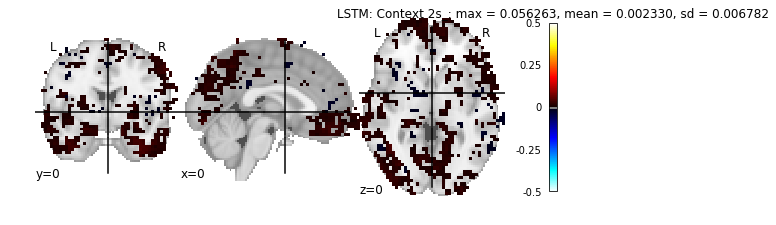

<Figure size 432x288 with 0 Axes>

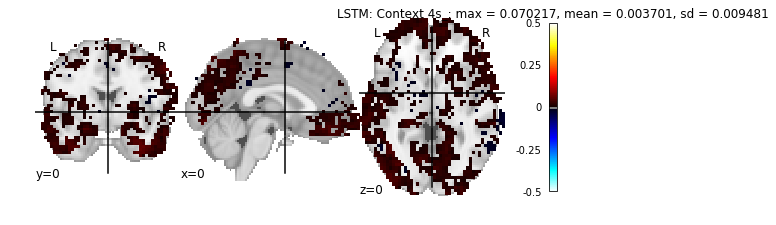

<Figure size 432x288 with 0 Axes>

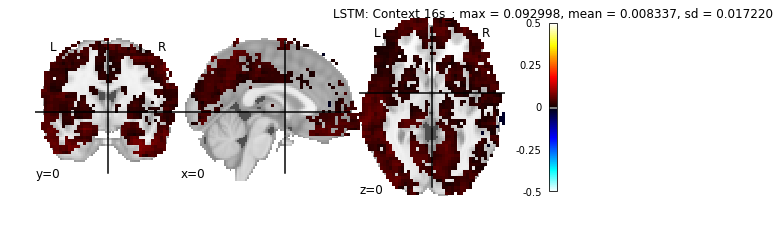

<Figure size 432x288 with 0 Axes>

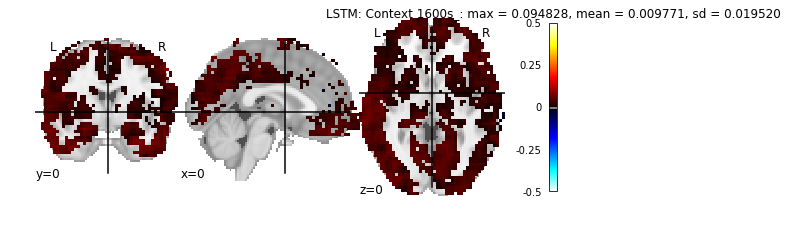

In [7]:
for context in contexts:
    plt.figure()
    f = ('../Wehbe/%s_layer1_%srdm_SL_result.npy' % (sub, context))
    rmap = np.load(f)
    im = nib.Nifti1Image(rmap, affine=affine1)
    plotting.plot_stat_map(im, threshold=.01, vmax=0.5, cut_coords=(0,0,0))
    plt.title('LSTM: Context %s: max = %f, mean = %f, sd = %f' % (context, rmap.max(), rmap.mean(), rmap.std()))

<Figure size 432x288 with 0 Axes>

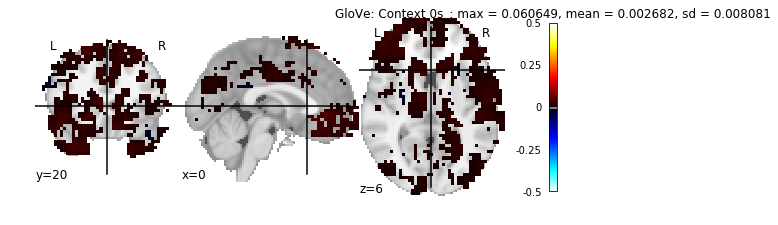

<Figure size 432x288 with 0 Axes>

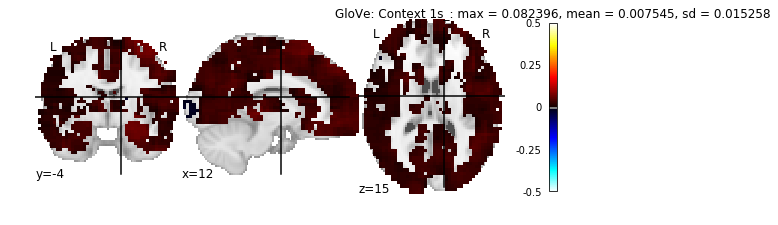

<Figure size 432x288 with 0 Axes>

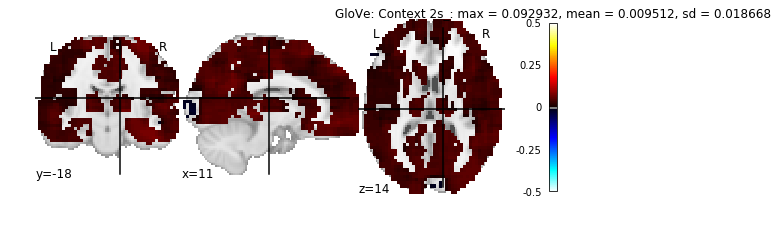

<Figure size 432x288 with 0 Axes>

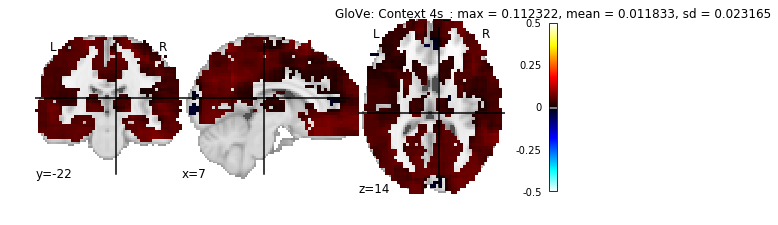

<Figure size 432x288 with 0 Axes>

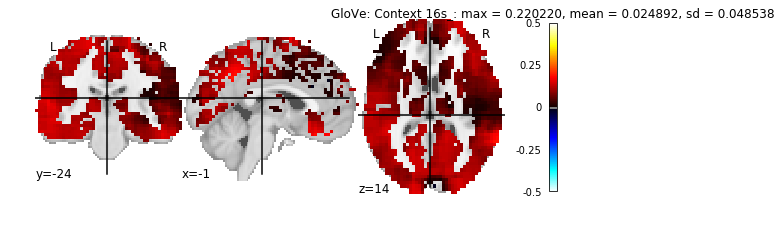

<Figure size 432x288 with 0 Axes>

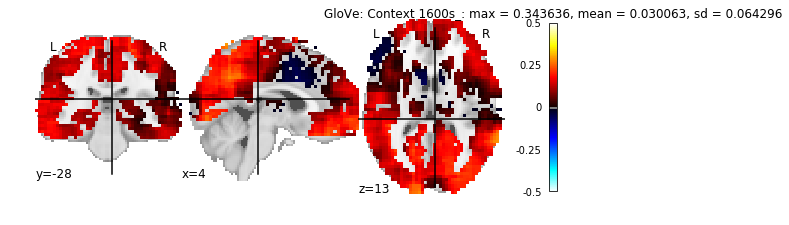

In [8]:
for context in contexts:
    plt.figure()
    f = ('../Wehbe/%s_glove_%srdm_SL_result.npy' % (sub, context))
    rmap = np.load(f)
    im = nib.Nifti1Image(rmap, affine=affine1)
    plotting.plot_stat_map(im, threshold=.01, vmax=0.5)
    plt.title('GloVe: Context %s: max = %f, mean = %f, sd = %f' % (context, rmap.max(), rmap.mean(), rmap.std()))

Now compare ranking of the 5.

In [9]:
#Load all context rmaps into an array
rmaps_context = []
for context in contexts:
    f = ('../Wehbe/%s_%s_%srdm_SL_result.npy' % (sub, layer, context))
    rmap = np.load(f)
    rmaps_context.append(rmap)

In [10]:
preferred = np.zeros(rmaps_context[0].shape)
for x in range(rmaps_context[0].shape[0]):
    for y in range(rmaps_context[0].shape[1]):
        for z in range(rmaps_context[0].shape[2]):
            preferred[x][y][z] = np.argmax([m[x][y][z] for m in rmaps_context])

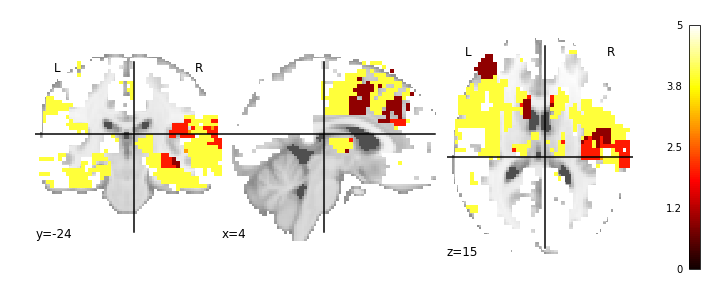

In [11]:
f, ax = plt.subplots(1,1, figsize = (12, 5))
plotting.plot_stat_map(nib.Nifti1Image(preferred, affine=affine1), axes=ax)

In [12]:
[np.sum(preferred==i) for i in range(6)]

[121450, 1037, 508, 101, 9437, 26467]

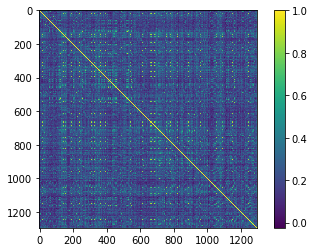

In [13]:
robjects.r['load']('TR_layer1_context_embeddings.RData')
y=robjects.r['layer1_' + context]
y=np.array(y)
model_rdm = np.corrcoef(y)
plt.imshow(model_rdm)
plt.colorbar()

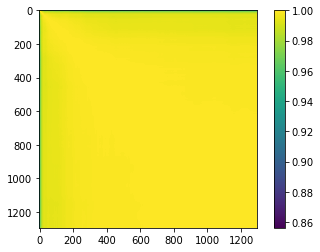

In [14]:
robjects.r['load']('/gpfs/milgram/project/chun/kxt3/official/glove/TR_glove_context_embeddings.RData')
y=robjects.r['glove_' + context]
y=np.array(y)
model_rdm = np.corrcoef(y)
plt.imshow(model_rdm)
plt.colorbar()

Analyze RDM for glove and lstm

Plot the model RDM's

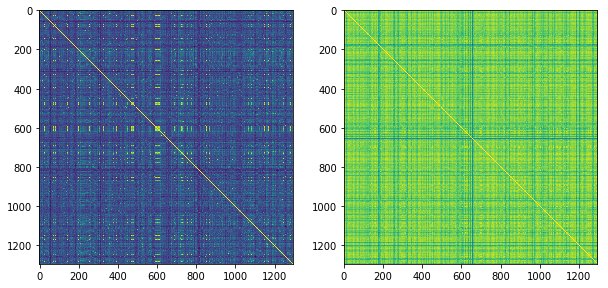

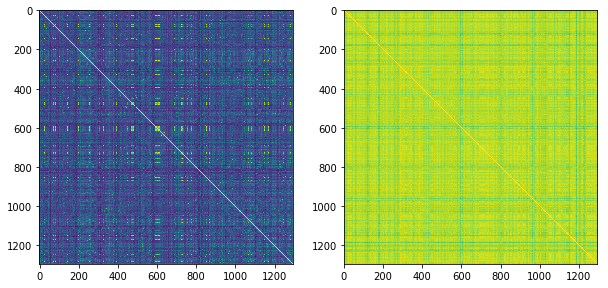

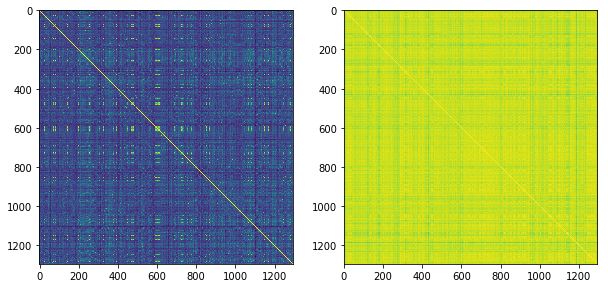

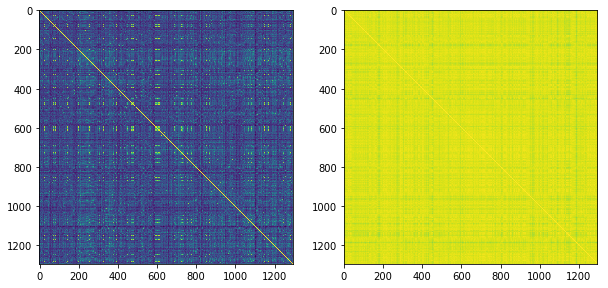

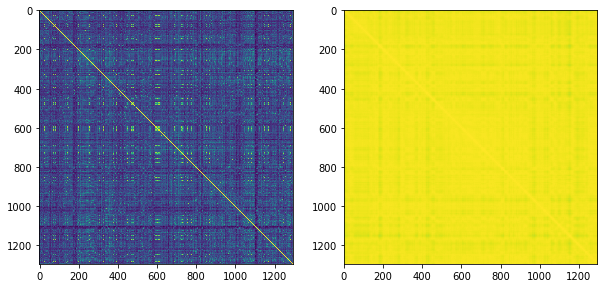

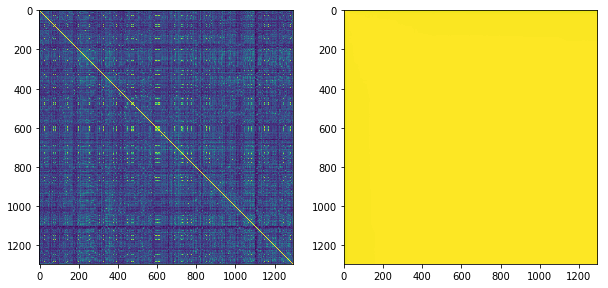

In [15]:
for context in contexts:
    f, axes = plt.subplots(1,2, figsize = (10, 10))
    path_to_lstm_embeddings = '/gpfs/milgram/project/chun/hf246/Language/Wehbe/'
    path_to_glove_embeddings = '/gpfs/milgram/project/chun/kxt3/official/glove/'
    
    robjects.r['load'](path_to_lstm_embeddings+'TR_layer1_context_embeddings.RData')
    y=robjects.r['layer1_' + context]
    y=np.array(y)
    model_rdm = np.corrcoef(y)
    im = axes[0].imshow(model_rdm, vmin=0, vmax=1)
    
    
    robjects.r['load'](path_to_glove_embeddings+'TR_glove_context_embeddings.RData')
    y=robjects.r['glove_' + context]
    y=np.array(y)
    model_rdm = np.corrcoef(y)
    im = axes[1].imshow(model_rdm, vmin=0, vmax=1)

In [16]:
path_to_fmri = '/gpfs/milgram/scratch/chun/hf246/wehbe_fmri/'
f = scipy.io.loadmat(path_to_fmri + 'subject_1.mat')
data = f['nonempty_data']


KeyError: 'nonempty_data'